## Task: Predict weekly sales of a walmart store using linear regression

You are provided with a dataset about Walmart's sales in a CSV file.

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

1. Store - the store number
2. Date - the week of sales
3. Weekly_Sales - sales for the given store
4. Holiday_Flag - whether the week is a special holiday week: 1 – Holiday week 0 – Non-holiday week
5. Temperature - Temperature on the day of sale
6. Fuel_Price - Cost of fuel in the region
7. CPI – Prevailing consumer price index
8. Unemployment - Prevailing unemployment rate

Note:

You might find it helpful to include information about the kind of holiday week it is. This is something you'll need to add through data processing.
You can use this information about the holiday weeks.

Holiday Events:
1. Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
2. Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
3. Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
4. Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

### Tasks:
- Preprocess the data:
    - Remove any column which might not be useful
    - Add holiday type information
    - Normalize the data
- Split the data randomly into training and testing sets (80:20 split)
- Build and train a linear regression model. You can use any framerwork for this (numpy, sklearn or pytorch)
- Evaluate the trained model on test data. Report Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).
- Visualize model performance using graphs.

In [ ]:
from IPython.display import clear_output

In [ ]:
# In case you run this notebook outside colab (where the libraries aren't already pre-installed)

%pip install gdown==4.5
%pip install pandas
%pip install numpy

clear_output()

In [ ]:
# Download the CSV file.
!gdown 1UjuHkxE8VSQOdklibKqZ72qodJLBynEv

Downloading...
From: https://drive.google.com/uc?id=1UjuHkxE8VSQOdklibKqZ72qodJLBynEv
To: /content/Walmart.csv
100% 364k/364k [00:00<00:00, 83.1MB/s]


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
data_df = pd.read_csv('Walmart.csv')

In [ ]:
data_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
data_y = data_df['Weekly_Sales'] # target
data_x = data_df.drop(['Weekly_Sales'], axis=1) # input features

In [ ]:
data_x.head()

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,0,46.50,2.625,211.350143,8.106


In [ ]:
data_y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

**Data processing(one-hot encoding for holidays and numerical features normalisation**

In [ ]:
# Data processing

# Assign holiday type information
holiday_dates = {
    'super_bowl': ['12-02-2010', '11-02-2011', '10-02-2012', '08-02-2013'],
    'labour_day': ['10-09-2010', '09-09-2011', '07-09-2012', '06-09-2013'],
    'thanksgiving': ['26-11-2010', '25-11-2011', '23-11-2012', '29-11-2013'],
    'christmas': ['31-12-2010', '30-12-2011', '28-12-2012', '27-12-2013']
}

# One-hot encoding for each holiday
for holiday, dates in holiday_dates.items():
    data_df[holiday] = data_df['Date'].apply(lambda x: 1 if x in dates else 0)

# Normalise features
scaler = StandardScaler()
numerical_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
data_df[numerical_features] = scaler.fit_transform(data_df[numerical_features])

data_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,super_bowl,labour_day,thanksgiving,christmas
0,1,05-02-2010,1643690.90,0,-0.995136,-1.713800,1.004175,0.056964,0,0,0,0
1,1,12-02-2010,1641957.44,1,-1.201170,-1.766089,1.007880,0.056964,1,0,0,0
2,1,19-02-2010,1611968.17,0,-1.124178,-1.840166,1.009074,0.056964,0,0,0,0
3,1,26-02-2010,1409727.59,0,-0.760907,-1.737766,1.009849,0.056964,0,0,0,0
4,1,05-03-2010,1554806.68,0,-0.767955,-1.598328,1.010624,0.056964,0,0,0,0


**Creation of testing and trainging set**

In [ ]:
# Split data into training and testing set
X = data_df.drop(['Date', 'Weekly_Sales', 'Store', 'Holiday_Flag'], axis = 1)
y = data_df['Weekly_Sales']

# train_test_split from sklearn
# random_state = 42, passing an int means split will remain the same for each run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8, random_state = 42)

print(X_train)


      Temperature  Fuel_Price       CPI  Unemployment  super_bowl  labour_day  \
1033     0.794655   -1.692013  1.100283     -0.897860           0           0   
915     -2.166822    0.029180  0.520411      0.436547           0           0   
5903     0.031242   -0.498071 -1.144296      0.535175           0           0   
2083     0.462288    1.192619 -0.898640     -0.102973           0           0   
5943     1.449628    0.837487 -1.075829      0.137465           0           0   
...           ...         ...       ...           ...         ...         ...   
3772    -1.157252    0.133759 -0.872275     -0.091778           0           0   
5191    -0.337451   -1.417493  0.985877      0.254219           0           0   
5226     1.412217    0.708942  1.085513      0.094815           0           0   
5390    -0.868804    0.151189 -1.054727      2.607425           0           0   
860     -1.810057   -1.761732  0.456265      0.541040           0           0   

      thanksgiving  christm

**Explore whether there is a linear relationship between features and target variable**

In [ ]:
# Calculate R^2 to check the correlation of each feature with target variable

R_squared = {}

for feature in X_train.columns:
  X_train_feature = X_train[[feature]]
  y_train_array = y_train.values.reshape(-1,1)

  w = np.linalg.solve(X_train_feature.T @ X_train_feature, X_train_feature.T @ y_train)
  y_hat = X_train_feature @ w
  y_hat = y_hat.to_numpy().reshape(-1,1)

  #print(y_train_array.shape)
  #print(y_hat.shape)

  # R^2
  ss_mean = np.sum((y_train_array - np.mean(y_train_array)) ** 2)
  ss_fit = np.sum((y_train_array - y_hat) ** 2)
  R_squared_per_feature = (ss_mean - ss_fit) / ss_mean

  R_squared[feature] = R_squared_per_feature

for feature, R2 in R_squared.items():
  print(f'{feature}: R^2 = {R2:.4f}')


Temperature: R^2 = -3.4322
Fuel_Price: R^2 = -3.4388
CPI: R^2 = -3.4339
Unemployment: R^2 = -3.4260
super_bowl: R^2 = -3.3704
labour_day: R^2 = -3.3685
thanksgiving: R^2 = -3.3400
christmas: R^2 = -3.3992


# Comment

Negative values of R^2 indicate that there is no linear relationship between any of the features with the target variable. More specifically, the fitted line gives a larger error than mean curve. Therefore, there must be a more complicate underlying relationship between the data.

# Train linear model

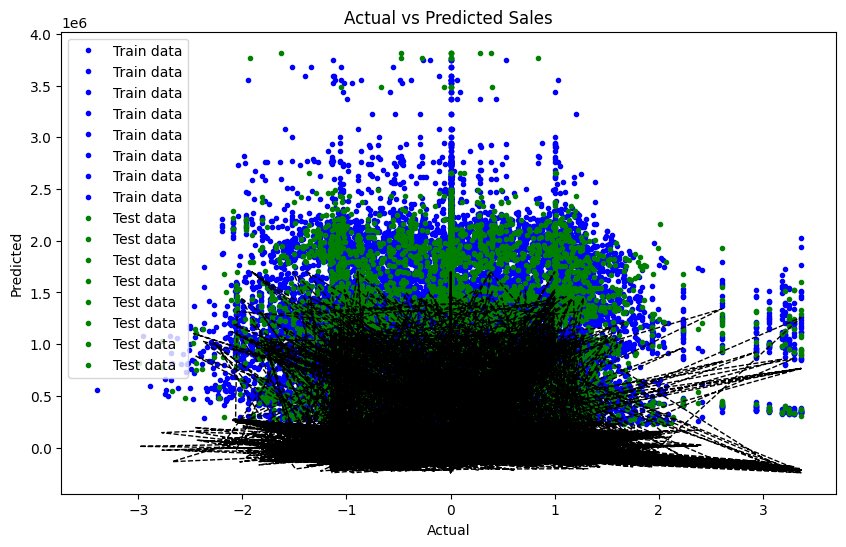

MAE = 1005638.52015512, RMSE = 1152761.22430523


In [ ]:
# Training linear model

def predict(X_transformed_np, w):
    return np.dot(X_transformed_np, w)

w = np.linalg.solve(X_train.T @ X_train, X_train.T @ y_train)

# Predict on test data
y_pred = predict(X_test, w)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, 'b.', label=f'Train data')
plt.plot(X_test, y_test, 'g.', label=f'Test data')
plt.plot(X_test, y_pred, 'k--', lw=1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted Sales')
plt.legend()
plt.show()

print(f"MAE = {mae:.8f}, RMSE = {rmse:.8f}")

# Comment

As expected from the R^2 calculations the graph shows that indeed the mean curve would fit the data better. Clearly there is no linear relationship between the features and the target. This leads to application of basis functions to explore models which will be able to represent the non linear relationship of the data.


# Use of basis functions

In [ ]:
def polynomial_basis_regression(X_train, y_train, X_test, y_test):
  mae_scores = []
  rmse_scores = []

  degrees = range(1,3)

  min_base = 1
  max_base = 3

  print(f'X_train shape : {X_train.shape}')
  print(f'y_train shape : {y_train.shape}')

  print(X_test)

  for base in degrees:
    A_train = np.ones((X_train.shape[0], 1))
    A_test = np.ones((X_test.shape[0], 1))

    # Iterate over each base and horizontally stack the results
    for i in range(1, base + 1):
      A_train = np.hstack((A_train, X_train ** i))

    #print(f'A_train shape : {A_train.shape}')
    #print(f'A_train.T shape : {A_train.T.shape}')
    #print(f'y_train shape : {y_train.shape}')

    W = np.linalg.solve(A_train.T @ A_train, A_train.T @ y_train)

    for i in range(1, base + 1):
      A_test = np.hstack((A_test, X_test ** i))

    y_pred = A_test @ W

    # Calculate MAE and RMSE
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    mae_scores.append(mae)
    rmse_scores.append(rmse)

    plt.plot(X_train, y_train, 'b.', label=f'Test data')
    plt.plot(X_test, y_pred, 'k--', lw=1, label=f'Prediction')

    plt.xlabel('X-points (features)')
    plt.ylabel('Y-points (labels)')
    plt.title(f"Base: {base}")

    plt.legend()
    plt.show()

    print(f"Degree {base}: MAE = {mae:.8f}, RMSE = {rmse:.8f}")

  plt.figure(figsize=(10, 6))
  plt.plot(degrees, mae_scores, label='MAE')
  plt.plot(degrees, rmse_scores, label='RMSE')
  plt.xlabel('Polynomial Degree')
  plt.ylabel('Error')
  plt.title('MAE and RMSE vs Polynomial Degree')
  plt.legend()
  plt.show()

X_train shape : (5148, 8)
y_train shape : (5148,)
      Temperature  Fuel_Price       CPI  Unemployment  super_bowl  labour_day  \
2436    -0.990798   -1.206157 -1.011199      0.641267           0           0   
3361     0.445480    1.318985 -0.922738      0.113475           0           0   
233      0.282279    0.029180  1.162453     -0.297563           0           0   
3667    -1.116045    0.460568 -0.892334     -0.213863           0           0   
5011    -0.059847   -1.432744  0.975816      0.295803           0           0   
...           ...         ...       ...           ...         ...         ...   
2600     0.733929   -0.907672 -0.990104      0.053232           0           0   
6308     0.466626   -1.001357  0.265999      0.479730           0           0   
6292    -1.808430   -1.251910  0.261546      0.529311           0           0   
151      0.141308   -1.393527  0.988510      0.107077           0           0   
2344    -1.976511   -0.280199 -1.100626     -0.604109      

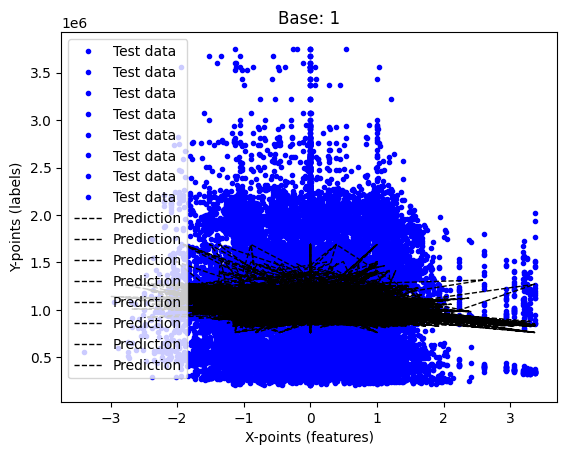

Degree 1: MAE = 473891.84404102, RMSE = 560869.26672009


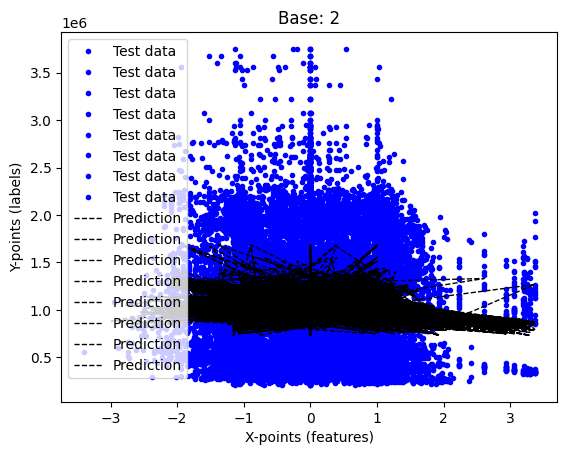

Degree 2: MAE = 470907.59393886, RMSE = 556914.28252109


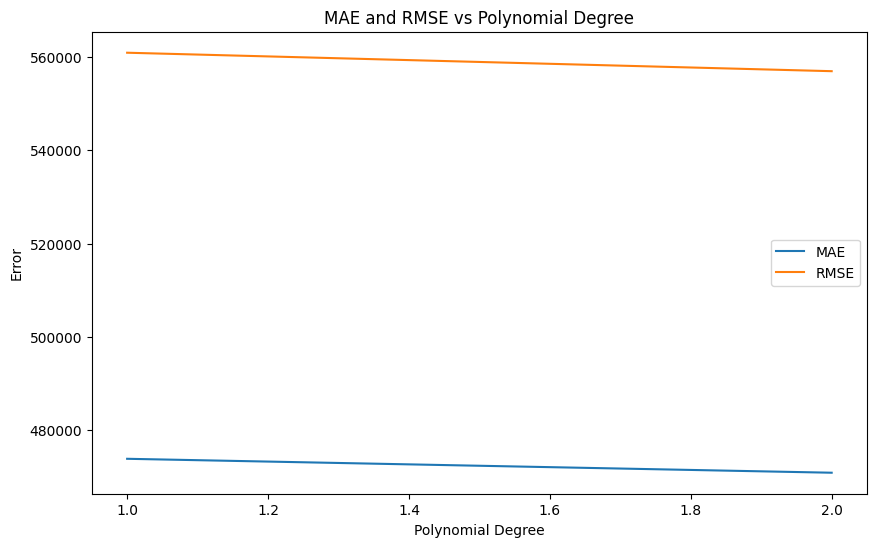

In [ ]:
polynomial_basis_regression(X_train, y_train, X_test, y_test)

Although the data are noisy we can still see an improvement with the use of basis functions since both RMSE and MAE are reduced by more than 50% comparing to the linear model without the basis functions. RMSE is higher than MAE, something that is expected since the power in the formula of RMSE makes it more sensivitive to outliers.

**Simpler models**

X_train shape : (5148, 4)
y_train shape : (5148,)
      Temperature  Fuel_Price       CPI  Unemployment
2436    -0.990798   -1.206157 -1.011199      0.641267
3361     0.445480    1.318985 -0.922738      0.113475
233      0.282279    0.029180  1.162453     -0.297563
3667    -1.116045    0.460568 -0.892334     -0.213863
5011    -0.059847   -1.432744  0.975816      0.295803
...           ...         ...       ...           ...
2600     0.733929   -0.907672 -0.990104      0.053232
6308     0.466626   -1.001357  0.265999      0.479730
6292    -1.808430   -1.251910  0.261546      0.529311
151      0.141308   -1.393527  0.988510      0.107077
2344    -1.976511   -0.280199 -1.100626     -0.604109

[1287 rows x 4 columns]


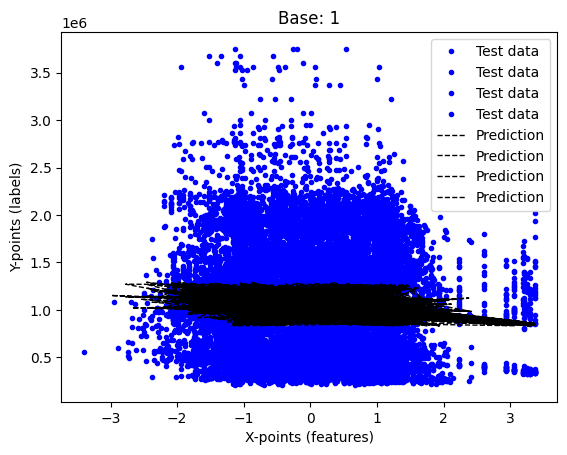

Degree 1: MAE = 475178.08409288, RMSE = 562598.71980383


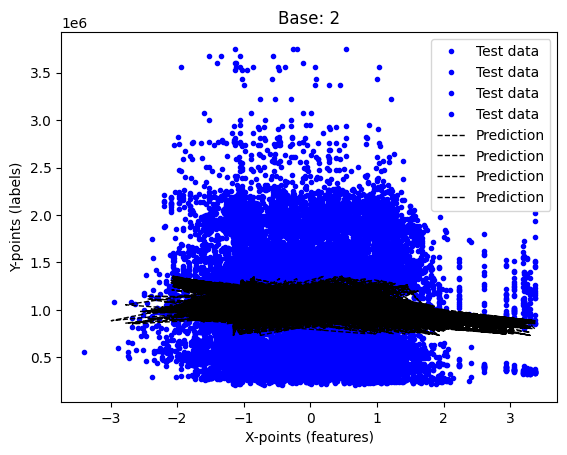

Degree 2: MAE = 472278.96473205, RMSE = 558834.57286767


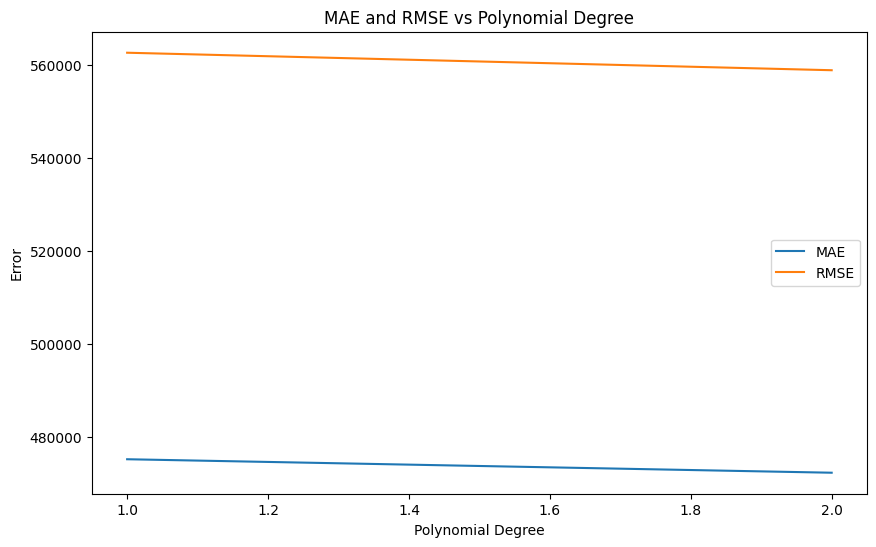

In [ ]:
# We will try to remove some features to explore
#whether there is an improvement in the accuracy of the model
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

# List of columns to drop
columns_to_drop = ['super_bowl', 'labour_day', 'thanksgiving', 'christmas']

# Drop the specified columns from the copies
X_train_holidays_dropped = X_train_copy.drop(columns_to_drop, axis=1)
X_test_holidays_dropped = X_test_copy.drop(columns_to_drop, axis=1)

polynomial_basis_regression(X_train_holidays_dropped, y_train, X_test_holidays_dropped, y_test)

X_train shape : (5148, 6)
y_train shape : (5148,)
      Temperature       CPI  super_bowl  labour_day  thanksgiving  christmas
2436    -0.990798 -1.011199           0           0             0          0
3361     0.445480 -0.922738           0           0             0          0
233      0.282279  1.162453           0           0             0          0
3667    -1.116045 -0.892334           0           0             0          0
5011    -0.059847  0.975816           0           0             0          0
...           ...       ...         ...         ...           ...        ...
2600     0.733929 -0.990104           0           0             0          0
6308     0.466626  0.265999           0           0             0          0
6292    -1.808430  0.261546           0           0             0          0
151      0.141308  0.988510           0           0             0          0
2344    -1.976511 -1.100626           0           0             0          0

[1287 rows x 6 columns]


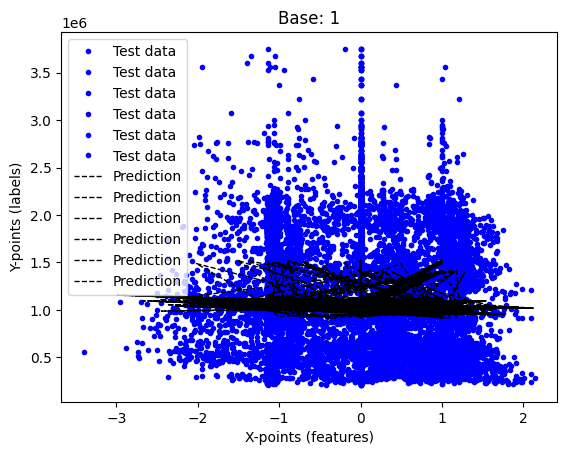

Degree 1: MAE = 472290.12351636, RMSE = 563327.70318657


LinAlgError: Singular matrix

In [ ]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

# List of columns to drop
columns_to_drop = ['Fuel_Price', 'Unemployment']

# Drop the specified columns from the copies
X_train_holidays_dropped = X_train_copy.drop(columns_to_drop, axis=1)
X_test_holidays_dropped = X_test_copy.drop(columns_to_drop, axis=1)

polynomial_basis_regression(X_train_holidays_dropped, y_train, X_test_holidays_dropped, y_test)

X_train shape : (5148, 3)
y_train shape : (5148,)
      Temperature  Fuel_Price       CPI
2436    -0.990798   -1.206157 -1.011199
3361     0.445480    1.318985 -0.922738
233      0.282279    0.029180  1.162453
3667    -1.116045    0.460568 -0.892334
5011    -0.059847   -1.432744  0.975816
...           ...         ...       ...
2600     0.733929   -0.907672 -0.990104
6308     0.466626   -1.001357  0.265999
6292    -1.808430   -1.251910  0.261546
151      0.141308   -1.393527  0.988510
2344    -1.976511   -0.280199 -1.100626

[1287 rows x 3 columns]


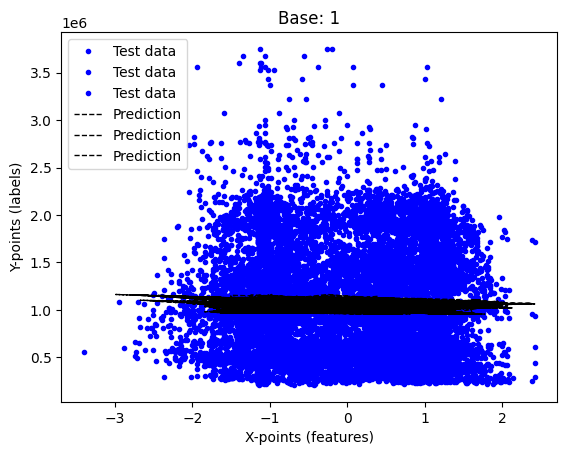

Degree 1: MAE = 473751.78918772, RMSE = 564957.40849919


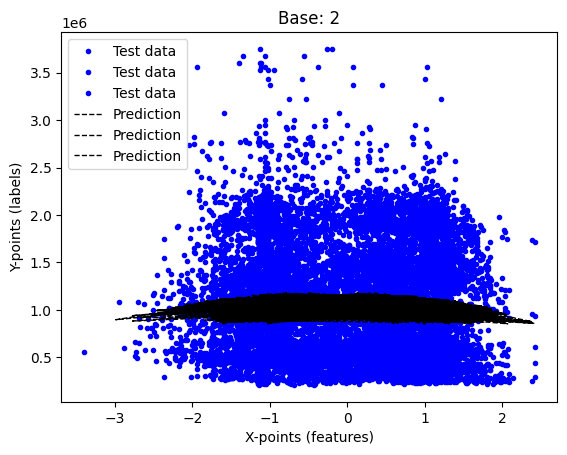

Degree 2: MAE = 472092.80891788, RMSE = 562138.00223353


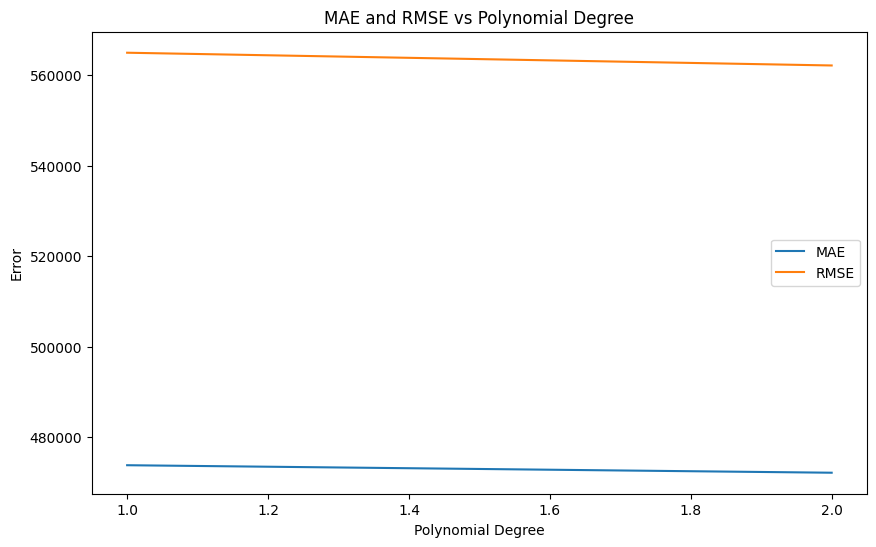

In [ ]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

# List of columns to drop
columns_to_drop = ['super_bowl', 'labour_day', 'thanksgiving', 'christmas', 'Unemployment']

# Drop the specified columns from the copies
X_train_holidays_dropped = X_train_copy.drop(columns_to_drop, axis=1)
X_test_holidays_dropped = X_test_copy.drop(columns_to_drop, axis=1)

polynomial_basis_regression(X_train_holidays_dropped, y_train, X_test_holidays_dropped, y_test)

X_train shape : (5148, 3)
y_train shape : (5148,)
      Temperature  Fuel_Price  Unemployment
2436    -0.990798   -1.206157      0.641267
3361     0.445480    1.318985      0.113475
233      0.282279    0.029180     -0.297563
3667    -1.116045    0.460568     -0.213863
5011    -0.059847   -1.432744      0.295803
...           ...         ...           ...
2600     0.733929   -0.907672      0.053232
6308     0.466626   -1.001357      0.479730
6292    -1.808430   -1.251910      0.529311
151      0.141308   -1.393527      0.107077
2344    -1.976511   -0.280199     -0.604109

[1287 rows x 3 columns]


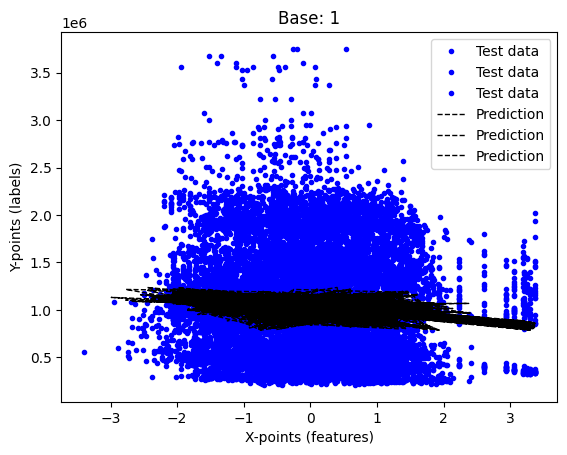

Degree 1: MAE = 476674.12577151, RMSE = 564783.87643484


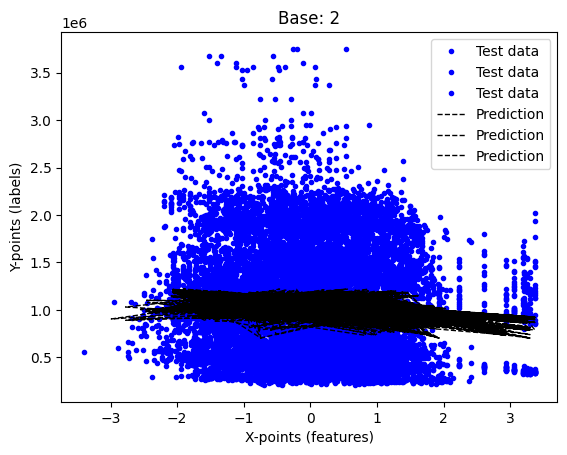

Degree 2: MAE = 475249.29142111, RMSE = 563773.33684579


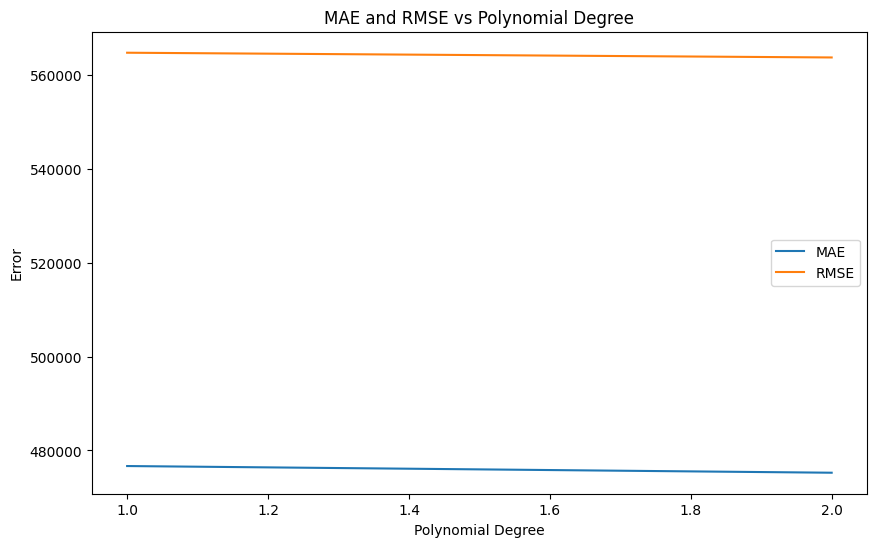

In [ ]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

# List of columns to drop
columns_to_drop = ['super_bowl', 'labour_day', 'thanksgiving', 'christmas', 'CPI']

# Drop the specified columns from the copies
X_train_holidays_dropped = X_train_copy.drop(columns_to_drop, axis=1)
X_test_holidays_dropped = X_test_copy.drop(columns_to_drop, axis=1)

polynomial_basis_regression(X_train_holidays_dropped, y_train, X_test_holidays_dropped, y_test)

X_train shape : (5148, 5)
y_train shape : (5148,)
           CPI  super_bowl  labour_day  thanksgiving  christmas
2436 -1.011199           0           0             0          0
3361 -0.922738           0           0             0          0
233   1.162453           0           0             0          0
3667 -0.892334           0           0             0          0
5011  0.975816           0           0             0          0
...        ...         ...         ...           ...        ...
2600 -0.990104           0           0             0          0
6308  0.265999           0           0             0          0
6292  0.261546           0           0             0          0
151   0.988510           0           0             0          0
2344 -1.100626           0           0             0          0

[1287 rows x 5 columns]


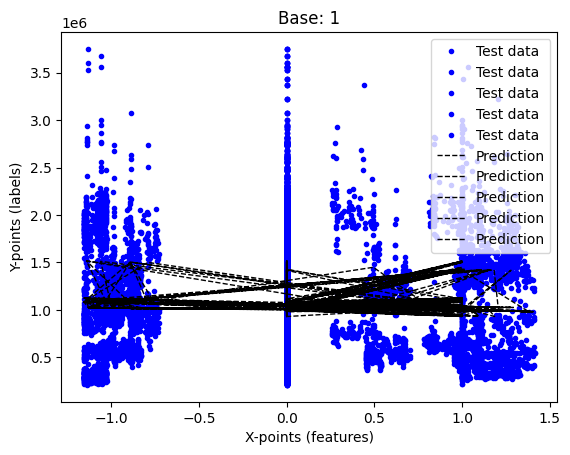

Degree 1: MAE = 472367.10026579, RMSE = 564146.55572739


LinAlgError: Singular matrix

In [ ]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

# List of columns to drop
columns_to_drop = ['Unemployment', 'Fuel_Price', 'Temperature']

# Drop the specified columns from the copies
X_train_holidays_dropped = X_train_copy.drop(columns_to_drop, axis=1)
X_test_holidays_dropped = X_test_copy.drop(columns_to_drop, axis=1)

polynomial_basis_regression(X_train_holidays_dropped, y_train, X_test_holidays_dropped, y_test)

**Comment**

In the above section we conducted some experiments by removing certain combinations of features from the noisy dataset to check if there is the possibility of achieving a better accuracy. As seen from the graphs there is no significant improvement in the accuracy of the model. Maybe tiny improvements in some of the metrics in some cases but nothing that would justify the exclusion of a feature completely. Note also that matrix A seems to be ill-conditioned since dropping some of the features lead to a singular matrix in some scenarios.